In [3]:
import numpy as np
import pandas as pd
from datetime import datetime

## 11.6 리샘플링과 빈도 변환

In [4]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
rng

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [6]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.195261
2000-01-02   -0.531044
2000-01-03   -1.416749
2000-01-04    1.124958
2000-01-05    1.700250
                ...   
2000-04-05    0.896288
2000-04-06   -1.018649
2000-04-07   -0.392869
2000-04-08    0.471657
2000-04-09    0.105765
Freq: D, Length: 100, dtype: float64

In [7]:
ts.resample('M').mean()

2000-01-31   -0.374182
2000-02-29    0.097815
2000-03-31    0.171832
2000-04-30   -0.158731
Freq: M, dtype: float64

In [8]:
ts.resample('M', kind='period').mean()

2000-01   -0.374182
2000-02    0.097815
2000-03    0.171832
2000-04   -0.158731
Freq: M, dtype: float64

### 다운샘플링

In [10]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
rng

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [12]:
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [13]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [14]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [15]:
ts.resample('5min',closed= 'right',
           label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

### OHLC 리샘플링

In [16]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### 업샘플링과 보간

In [17]:
frame =pd.DataFrame(np.random.randn(2,4),
                   index= pd.date_range('1/1/2000', periods=2,
                                       freq='W-WED'),
                   columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.545981,0.509613,-1.122559,-0.589519
2000-01-12,0.107624,0.356955,-0.967036,-0.796334


In [18]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.545981,0.509613,-1.122559,-0.589519
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.107624,0.356955,-0.967036,-0.796334


In [19]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.545981,0.509613,-1.122559,-0.589519
2000-01-06,-0.545981,0.509613,-1.122559,-0.589519
2000-01-07,-0.545981,0.509613,-1.122559,-0.589519
2000-01-08,-0.545981,0.509613,-1.122559,-0.589519
2000-01-09,-0.545981,0.509613,-1.122559,-0.589519
2000-01-10,-0.545981,0.509613,-1.122559,-0.589519
2000-01-11,-0.545981,0.509613,-1.122559,-0.589519
2000-01-12,0.107624,0.356955,-0.967036,-0.796334


In [20]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.545981,0.509613,-1.122559,-0.589519
2000-01-06,-0.545981,0.509613,-1.122559,-0.589519
2000-01-07,-0.545981,0.509613,-1.122559,-0.589519
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.107624,0.356955,-0.967036,-0.796334


In [21]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.545981,0.509613,-1.122559,-0.589519
2000-01-13,0.107624,0.356955,-0.967036,-0.796334


### 기간 리샘플링

In [22]:
frame = pd.DataFrame(np.random.randn(24, 4),
                    index= pd.period_range('1-2000', '12-2001', 
                                          freq='M'),
                    columns= ['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.532588,-1.368971,0.112589,-0.485594
2000-02,-0.578010,-0.025176,-0.752462,-0.435186
2000-03,0.922341,0.571302,0.177017,0.181688
2000-04,0.217335,-0.327058,-0.462627,2.192681
2000-05,-0.367360,0.470432,-0.733623,-0.130940


In [23]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.183072,-0.269970,-0.178460,0.201713
2001,-0.381782,-0.398257,-0.031856,0.060112


In [24]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.183072,-0.269970,-0.178460,0.201713
2000Q2,0.183072,-0.269970,-0.178460,0.201713
2000Q3,0.183072,-0.269970,-0.178460,0.201713
2000Q4,0.183072,-0.269970,-0.178460,0.201713
2001Q1,-0.381782,-0.398257,-0.031856,0.060112
2001Q2,-0.381782,-0.398257,-0.031856,0.060112
2001Q3,-0.381782,-0.398257,-0.031856,0.060112
2001Q4,-0.381782,-0.398257,-0.031856,0.060112


In [25]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.183072,-0.269970,-0.178460,0.201713
2001Q1,0.183072,-0.269970,-0.178460,0.201713
2001Q2,0.183072,-0.269970,-0.178460,0.201713
2001Q3,0.183072,-0.269970,-0.178460,0.201713
2001Q4,-0.381782,-0.398257,-0.031856,0.060112


## 11.7 이동창 함수

In [27]:
close_px_all = pd.read_csv("C:/github/pydata-book-2nd-edition/examples/stock_px_2.csv",
                          parse_dates=True, index_col=0)

In [28]:
close_px = close_px_all[['AAPL','MSFT', 'XOM']]

In [29]:
close_px = close_px.resample('B').ffill()

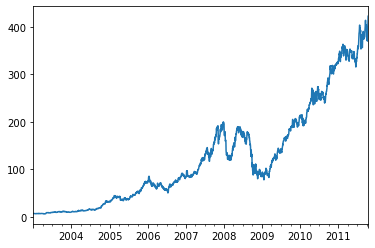

In [30]:
close_px.AAPL.plot()

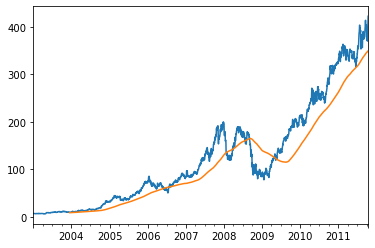

In [32]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [35]:
app1_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
app1_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

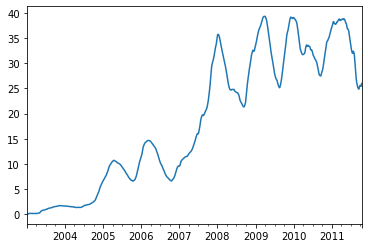

In [38]:
app1_std250.plot()

In [ ]:
expanding_mean = app1_std250.expanding().mean()

In [41]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### 지수 가중 함수

In [42]:
appl_px = close_px.AAPL['2006':'2007']

In [43]:
ma60 = appl_px.rolling(30, min_periods=20).mean()

In [44]:
ewma60 = appl_px.ewm(span=30).mean()

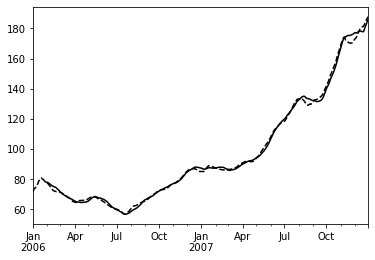

In [48]:
ma60.plot(style='k-', label= 'Simple MA')
ewma60.plot(style='k--',label='EW MA')

### 이진 이동창 함수

In [49]:
spx_px = close_px_all['SPX']

In [50]:
spx_rets = spx_px.pct_change()

In [51]:
returns = close_px.pct_change()

In [52]:
corr = returns.AAPL.rolling(125,min_periods=100).corr(spx_rets)

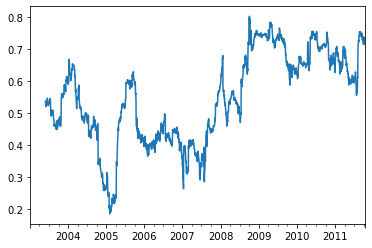

In [53]:
corr.plot()

In [54]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

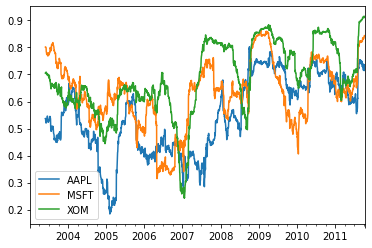

In [55]:
corr.plot()

### 사용자 정의 이동창 함수

In [56]:
from scipy.stats import percentileofscore

In [57]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [58]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

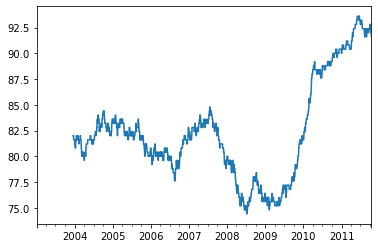

In [59]:
result.plot()